In [1]:
# Test 1-1 Dataset A v2
# This test uses the new dataset 16000 images
# This test uses a simple CNN to classify between having an circle or not

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

2024-04-16 00:24:00.713535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 00:24:00.713559: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 00:24:00.714273: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 00:24:00.719611: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 00:24:01.451955: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_dir = '../../Dataset_Scripts/Datasets/Dataset_A/train'
test_dir = '../../Dataset_Scripts/Datasets/Dataset_A/test'

In [4]:
IMG_SIZE = 250
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

658


In [5]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=False,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=False
    )

Found 11000 files belonging to 2 classes.


2024-04-16 00:24:02.508021: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-16 00:24:02.508270: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-16 00:24:02.508393: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 5000 files belonging to 2 classes.


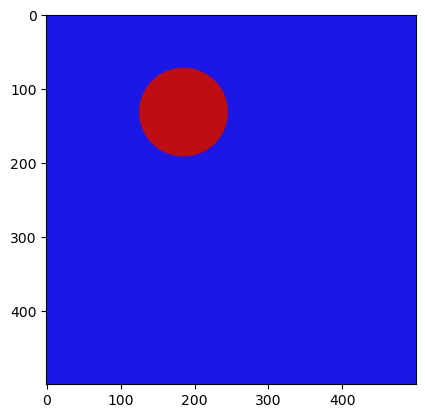

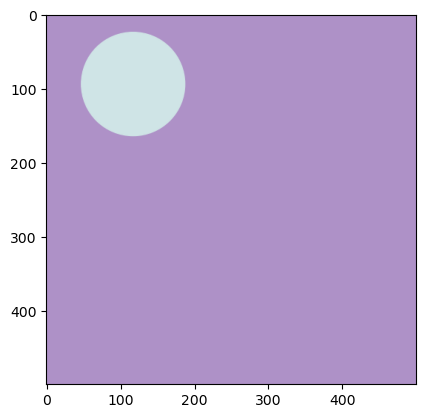

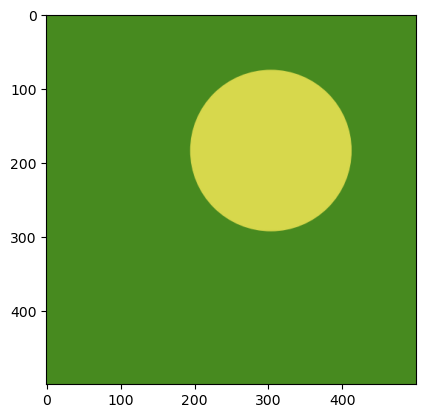

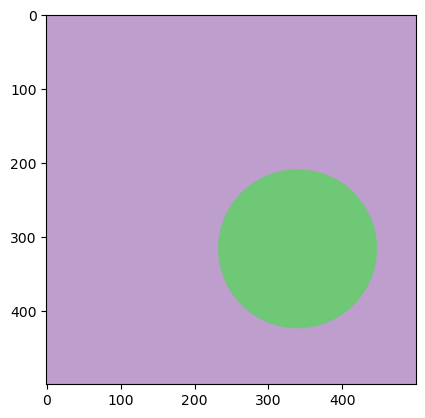

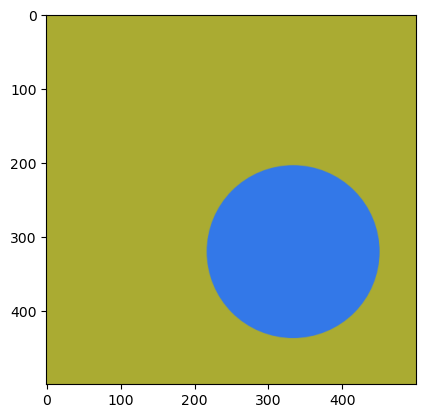

In [6]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [7]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 123, 64)      0         
 g2D)                                                        

In [9]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [10]:
checkpoint_filepath = 'models/1-1/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)


In [11]:
# Best Epoch = ?
history = model.fit(train_dataset, epochs=15, batch_size=16, validation_data=test_dataset, callbacks=[callbacks])

Epoch 1/15


2024-04-16 00:24:07.451747: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-04-16 00:24:07.533043: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-16 00:24:10.175348: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb3707d1790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-16 00:24:10.175370: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-04-16 00:24:10.179676: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1713223450.215746   16332 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-04-16 00:24:13.569041: W extern

  1/344 [..............................] - ETA: 1:11:48 - loss: 0.6947 - acc: 0.4688

2024-04-16 00:24:18.994167: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.36GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


344/344 [==============================] - ETA: 0s - loss: 0.6652 - acc: 0.5855
Epoch 1: val_loss improved from inf to 0.58978, saving model to models/1-1/ch-001.ckpt
INFO:tensorflow:Assets written to: models/1-1/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/ch-001.ckpt/assets


344/344 [==============================] - 111s 286ms/step - loss: 0.6652 - acc: 0.5855 - val_loss: 0.5898 - val_acc: 0.6188
Epoch 2/15
344/344 [==============================] - ETA: 0s - loss: 0.3882 - acc: 0.8463
Epoch 2: val_loss improved from 0.58978 to 0.18609, saving model to models/1-1/ch-002.ckpt
INFO:tensorflow:Assets written to: models/1-1/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/ch-002.ckpt/assets


344/344 [==============================] - 92s 267ms/step - loss: 0.3882 - acc: 0.8463 - val_loss: 0.1861 - val_acc: 0.9420
Epoch 3/15
344/344 [==============================] - ETA: 0s - loss: 0.1190 - acc: 0.9646
Epoch 3: val_loss improved from 0.18609 to 0.02900, saving model to models/1-1/ch-003.ckpt
INFO:tensorflow:Assets written to: models/1-1/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/ch-003.ckpt/assets


344/344 [==============================] - 92s 268ms/step - loss: 0.1190 - acc: 0.9646 - val_loss: 0.0290 - val_acc: 0.9912
Epoch 4/15
344/344 [==============================] - ETA: 0s - loss: 0.0626 - acc: 0.9847
Epoch 4: val_loss did not improve from 0.02900
344/344 [==============================] - 91s 263ms/step - loss: 0.0626 - acc: 0.9847 - val_loss: 0.0408 - val_acc: 0.9894
Epoch 5/15
344/344 [==============================] - ETA: 0s - loss: 0.0443 - acc: 0.9897
Epoch 5: val_loss improved from 0.02900 to 0.01382, saving model to models/1-1/ch-005.ckpt
INFO:tensorflow:Assets written to: models/1-1/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/ch-005.ckpt/assets


344/344 [==============================] - 87s 254ms/step - loss: 0.0443 - acc: 0.9897 - val_loss: 0.0138 - val_acc: 0.9964
Epoch 6/15
344/344 [==============================] - ETA: 0s - loss: 0.0597 - acc: 0.9894
Epoch 6: val_loss improved from 0.01382 to 0.01003, saving model to models/1-1/ch-006.ckpt
INFO:tensorflow:Assets written to: models/1-1/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/1-1/ch-006.ckpt/assets


344/344 [==============================] - 85s 247ms/step - loss: 0.0597 - acc: 0.9894 - val_loss: 0.0100 - val_acc: 0.9980
Epoch 7/15
344/344 [==============================] - ETA: 0s - loss: 0.0275 - acc: 0.9937
Epoch 7: val_loss did not improve from 0.01003
344/344 [==============================] - 83s 240ms/step - loss: 0.0275 - acc: 0.9937 - val_loss: 0.0324 - val_acc: 0.9906
Epoch 8/15
344/344 [==============================] - ETA: 0s - loss: 0.0541 - acc: 0.9914
Epoch 8: val_loss did not improve from 0.01003
344/344 [==============================] - 83s 242ms/step - loss: 0.0541 - acc: 0.9914 - val_loss: 0.0425 - val_acc: 0.9934
Epoch 9/15
344/344 [==============================] - ETA: 0s - loss: 0.0372 - acc: 0.9930
Epoch 9: val_loss did not improve from 0.01003
344/344 [==============================] - 82s 239ms/step - loss: 0.0372 - acc: 0.9930 - val_loss: 0.0660 - val_acc: 0.9846
Epoch 10/15
344/344 [==============================] - ETA: 0s - loss: 0.0267 - acc: 0.995

In [12]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

157/157 [==============================] - 15s 95ms/step - loss: 0.0123 - acc: 0.9968
0.012317394837737083 0.9968000054359436


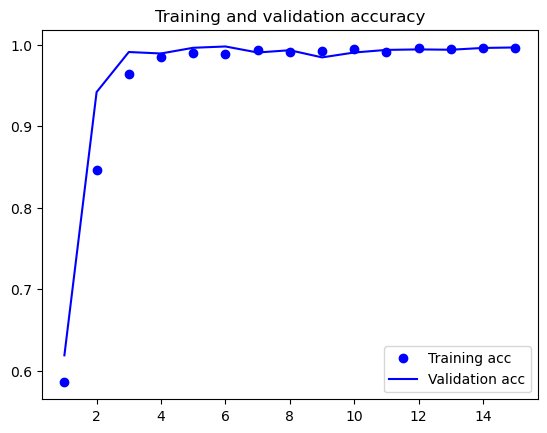

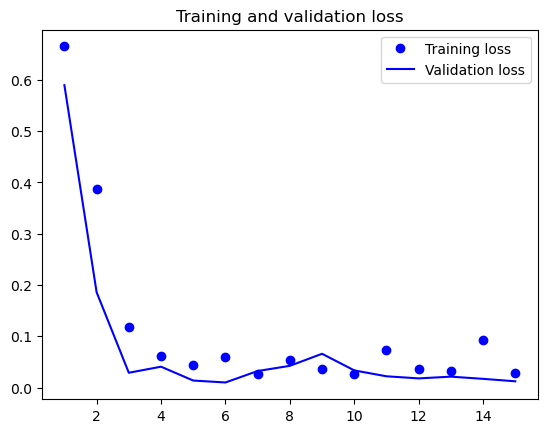

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/train_test_acc",dpi=100)
plt.show()

In [15]:
import csv
with open('results/1-1/results.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Index', 'Label', 'Prediction'])
    for i, (data_batch, labels_batch) in enumerate(test_dataset):
        predictions = model.predict(data_batch)
        for j in range(len(predictions)):
            writer.writerow([i * BATCH_SIZE + j, labels_batch[j].numpy(), int(predictions[j][0].round())])

1/1 [==============================] - 0s 69ms/step


2024-04-16 00:58:43.101130: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 96000000 bytes after encountering the first element of size 96000000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 [==============================] - 0s 76ms/step


2024-04-16 00:58:45.256432: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 96000000 bytes after encountering the first element of size 96000000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 [==============================] - 0s 88ms/step


2024-04-16 00:58:49.582723: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 96000000 bytes after encountering the first element of size 96000000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 [==============================] - 0s 80ms/step


In [17]:
with open('results/1-1/results.csv', mode='r') as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        if lines[1] != lines[2]:
            print(lines)

['Index', 'Label', 'Prediction']
['235', '0', '1']
['610', '0', '1']
['800', '0', '1']
['1062', '0', '1']
['1291', '0', '1']
['1317', '0', '1']
['1843', '0', '1']
['2148', '0', '1']
['2697', '0', '1']
['2705', '0', '1']
['3236', '0', '1']
['3789', '0', '1']
['3809', '0', '1']
['4365', '0', '1']
['4395', '0', '1']
['4935', '0', '1']
